# <u>Drought Prediction</u>: Exploratory Data Analysis

INSERT INTRODUCTION AND CONTEXT

#### Import neccesary libraries for data exploration.

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Load Training Dataset and Soil Dataset.  Convert Training Dataset date variable from object to datetime.

In [2]:
# Local location of the data
# local_data = 'D:\\Data_Science\\DroughtProject\\Data\\' # Location on Windows
local_data = '/home/chad/Data/Drought_Prediction/' # Location on Linux

# Load the training set and the soil variables.
soil_set = pd.read_csv(local_data + 'soil_data.csv')
train_set = pd.read_csv(local_data + 'train_timeseries.csv')

In [3]:
# Convert date column from object to datetime for training set.
train_set['date'] = pd.to_datetime(train_set['date'])

#### Confirm datasets are properly loaded and contain expected datatypes.

In [4]:
soil_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fips           3109 non-null   int64  
 1   lat            3109 non-null   float64
 2   lon            3109 non-null   float64
 3   elevation      3109 non-null   int64  
 4   slope1         3109 non-null   float64
 5   slope2         3109 non-null   float64
 6   slope3         3109 non-null   float64
 7   slope4         3109 non-null   float64
 8   slope5         3109 non-null   float64
 9   slope6         3109 non-null   float64
 10  slope7         3109 non-null   float64
 11  slope8         3109 non-null   float64
 12  aspectN        3109 non-null   float64
 13  aspectE        3109 non-null   float64
 14  aspectS        3109 non-null   float64
 15  aspectW        3109 non-null   float64
 16  aspectUnknown  3109 non-null   float64
 17  WAT_LAND       3109 non-null   float64
 18  NVG_LAND

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype         
---  ------       -----         
 0   fips         int64         
 1   date         datetime64[ns]
 2   PRECTOT      float64       
 3   PS           float64       
 4   QV2M         float64       
 5   T2M          float64       
 6   T2MDEW       float64       
 7   T2MWET       float64       
 8   T2M_MAX      float64       
 9   T2M_MIN      float64       
 10  T2M_RANGE    float64       
 11  TS           float64       
 12  WS10M        float64       
 13  WS10M_MAX    float64       
 14  WS10M_MIN    float64       
 15  WS10M_RANGE  float64       
 16  WS50M        float64       
 17  WS50M_MAX    float64       
 18  WS50M_MIN    float64       
 19  WS50M_RANGE  float64       
 20  score        float64       
dtypes: datetime64[ns](1), float64(19), int64(1)
memory usage: 3.0 GB


In [6]:
soil_set.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [7]:
train_set.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


#### Initial exploration of Training dataset and consideration of correlated variables.

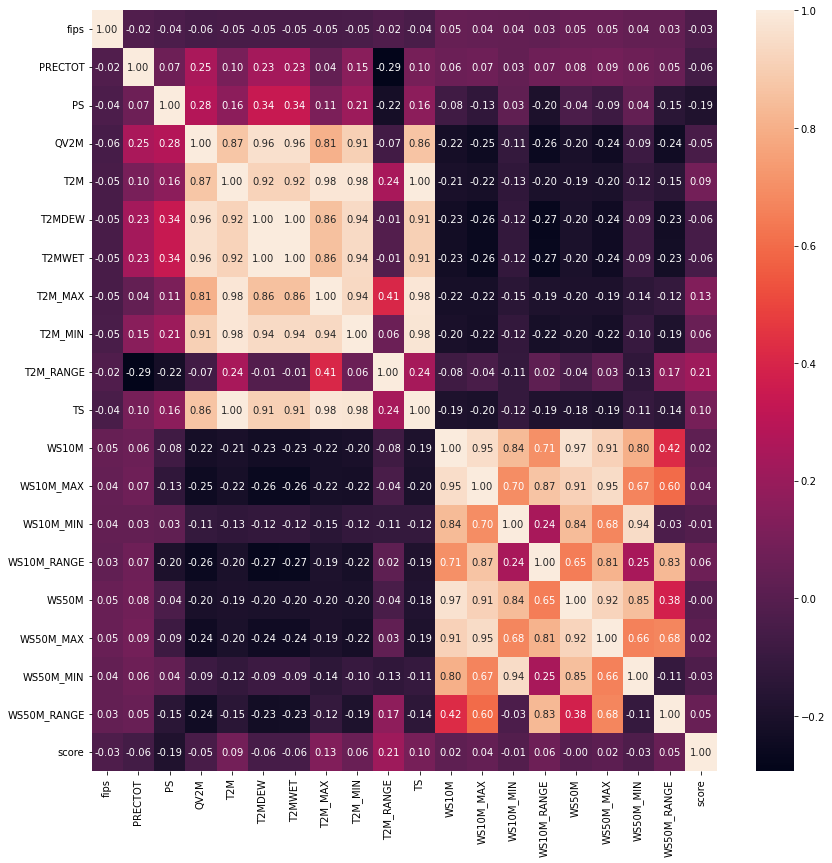

In [20]:
# Heatmap of correlation matrix for meteorological variables and drought score.
plt.subplots(figsize=(14,14))
sns.heatmap(train_set.corr(), annot=True, fmt='.2f');

The different temperature and humidity variables are highly correlated.  The wind variables are also highly correlated but less than might be expected.  The wind and temperature/humidity variables do not appear to have a strong correlation with each other. <br>

#### Initial exploration of how the data change over the timeseries.

<AxesSubplot:xlabel='Date', ylabel='Earth Skin Temperature (C)'>

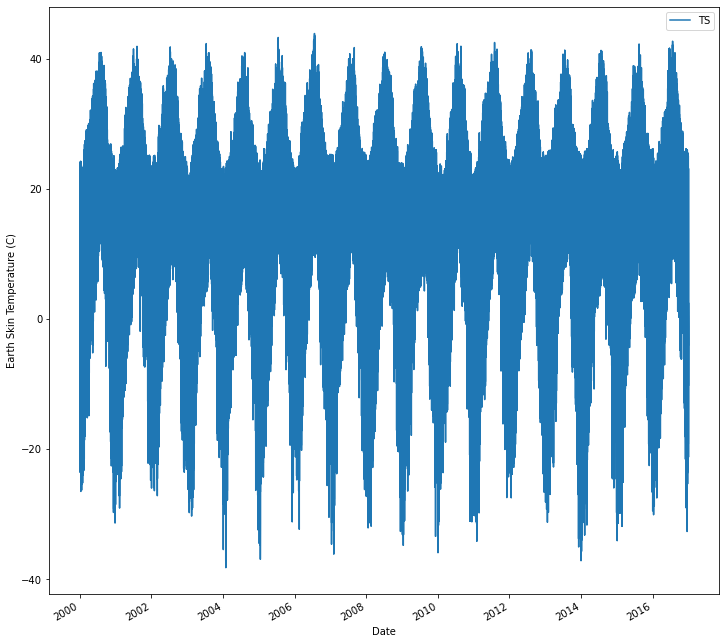

In [9]:
train_set.plot(x='date', y='TS', ylabel='Earth Skin Temperature (C)', xlabel='Date', figsize=(12,12))

In [10]:
train_set.TS.describe()

count    1.930068e+07
mean     1.288900e+01
std      1.114961e+01
min     -3.823000e+01
25%      4.340000e+00
50%      1.404000e+01
75%      2.207000e+01
max      4.385000e+01
Name: TS, dtype: float64

The TS (Earth Skin Temperature) is in Celsius.  The temperature appears to have an expected seasonal component.  The temperature range seems appropriate for North America.

#### One year temperature sample from one county in the training dataset.

<AxesSubplot:xlabel='Date', ylabel='Earth Skin Temperature (C)'>

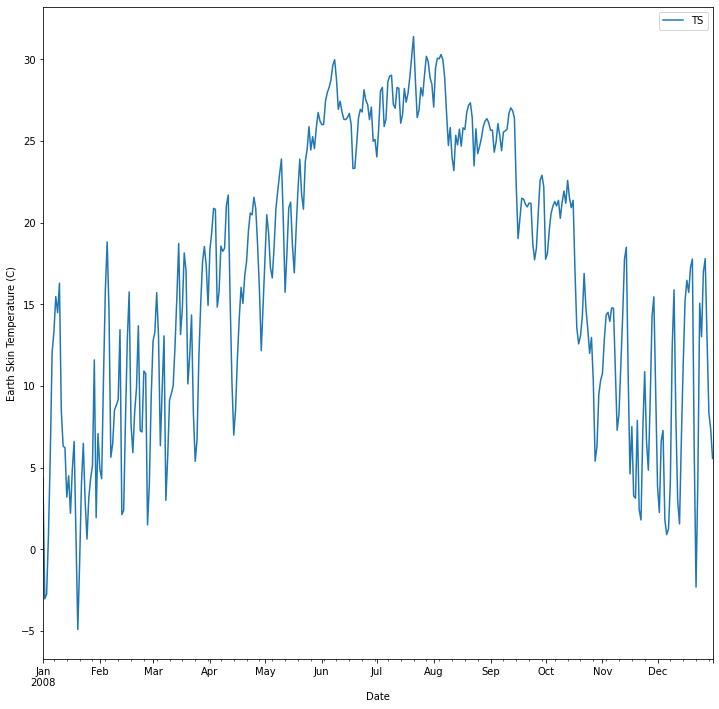

In [11]:
train_set[(train_set.fips == 1001) & (pd.DatetimeIndex(train_set['date']).year == 2008)].\
    plot(x='date', y='TS', ylabel='Earth Skin Temperature (C)', xlabel='Date', figsize=(12,12))

### Pairwise plot of the Training Dataset for the year 2008.
Run out of RAM to run pairplot on the entire dataset.  So, upgraded RAM from 16GB to 32GB, switched from Windows to Linux, and am now able to run pairplot for one year or a complete seasonal cycle. SEE 02b_Exploratory_Data_Analysis_pairplot notebook .

In [12]:
# train_set_2008 = train_set[pd.DatetimeIndex(train_set['date']).year == 2008]

In [13]:
# SEE 02b_Exploratory_Data_Analysis_pairplot notebook
# sns.pairplot(train_set_2008)

### Exploration of Training Dataset with PCA.

In [14]:
train_set.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [15]:
features = ['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE']

# Separating out the features
x = train_set.loc[:, features].values

# Separating out the target
y = train_set.loc[:,['score']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [16]:
pca = PCA(n_components=12)
components = pca.fit(x)

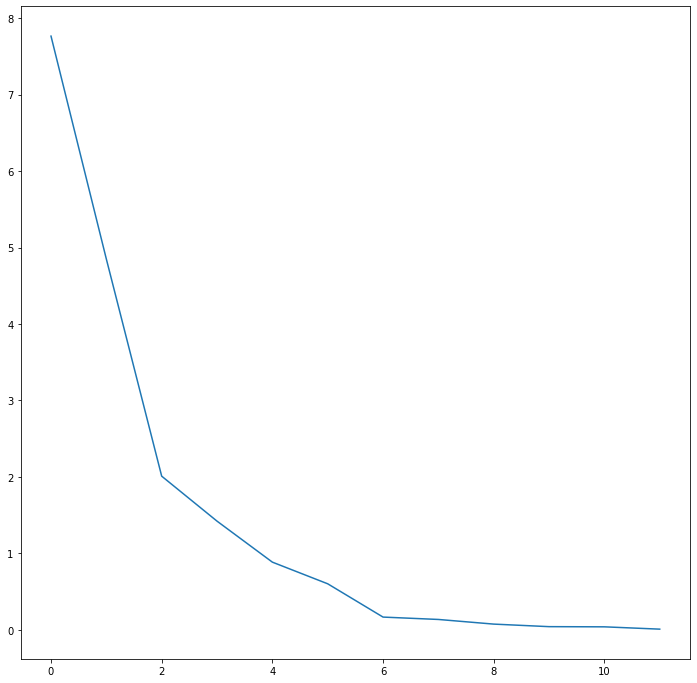

In [17]:
plt.subplots(figsize=(12,12))
plt.plot(components.explained_variance_)

Looking for the 'elbow' in the graph, there appears to be a turn at around 6 components. 

#### Initial exploration of Training dataset and consideration of correlated variables.

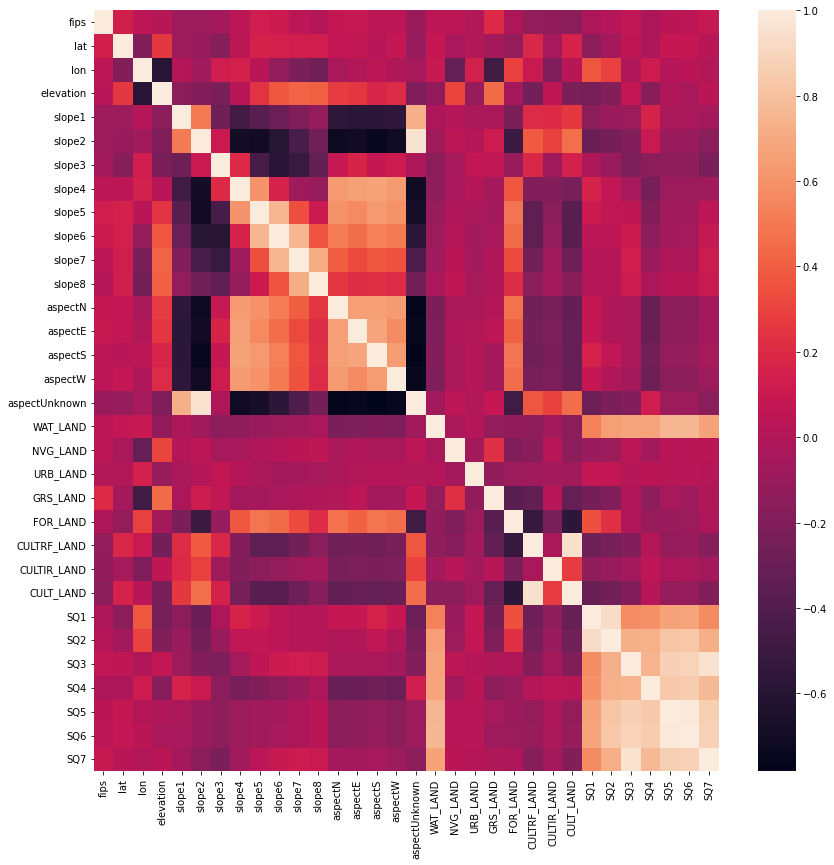

In [23]:
# Heatmap of correlation matrix for soil variables.
plt.subplots(figsize=(14,14))
sns.heatmap(soil_set.corr(), annot=False, fmt='.2f');

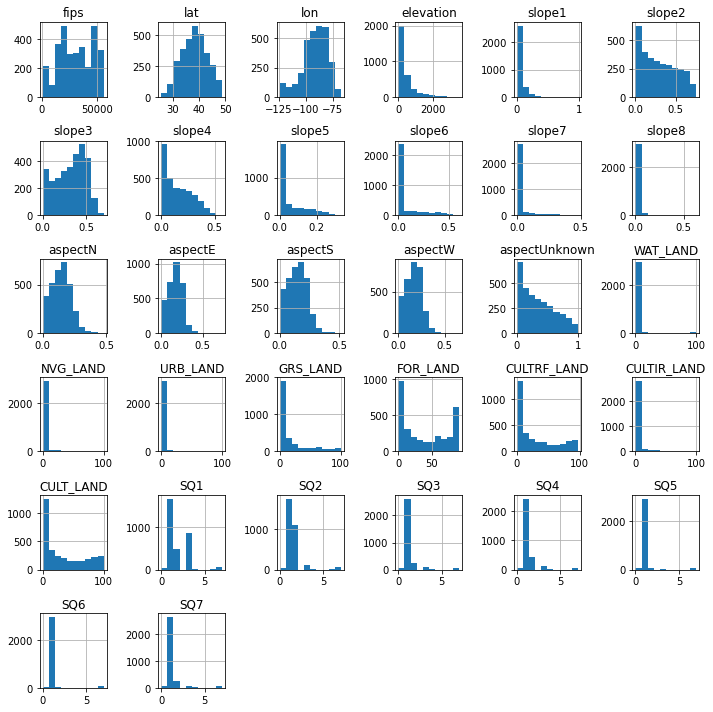

In [5]:
soil_set.hist(figsize=(10,10))
plt.tight_layout()

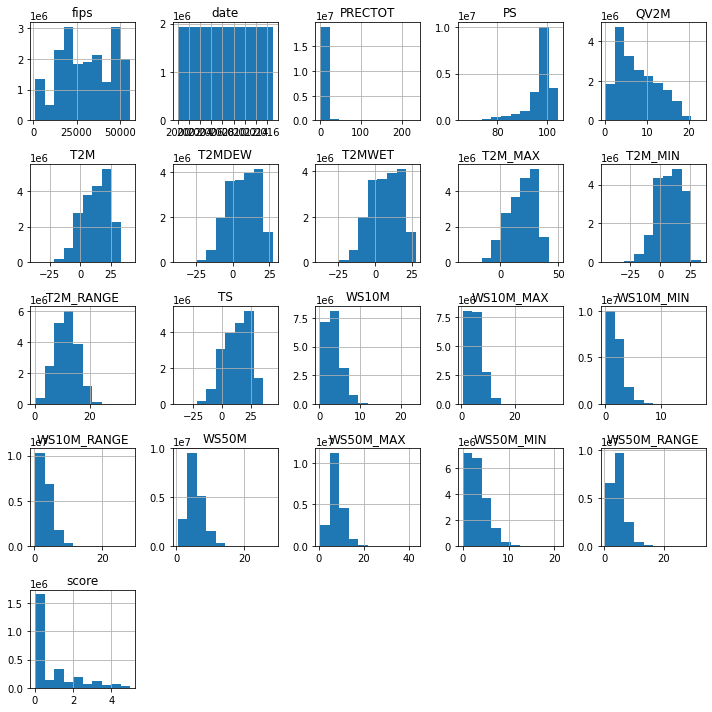

In [6]:
train_set.hist(figsize=(10,10))
plt.tight_layout()

# Determining Correlations greater than 0.92 for Feature Selection.

In [8]:
train_set.corr()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
fips,1.000000,-0.017089,-0.035969,-0.055478,-0.048457,-0.050700,-0.050886,-0.050303,-0.046373,-0.022537,-0.044336,0.046493,0.041321,0.035296,0.031267,0.051473,0.053376,0.036962,0.034202,-0.030001
PRECTOT,-0.017089,1.000000,0.067633,0.249676,0.100949,0.234136,0.234132,0.036296,0.151195,-0.294651,0.097151,0.063153,0.072625,0.034942,0.073766,0.079093,0.087746,0.064506,0.052563,-0.064059
PS,-0.035969,0.067633,1.000000,0.278020,0.163697,0.338053,0.338135,0.112778,0.206536,-0.220336,0.163470,-0.076628,-0.131815,0.026716,-0.196463,-0.039484,-0.086798,0.038759,-0.152273,-0.185663
QV2M,-0.055478,0.249676,0.278020,1.000000,0.872572,0.959707,0.960798,0.807513,0.907267,-0.068247,0.864949,-0.220085,-0.248944,-0.112763,-0.257725,-0.203760,-0.243984,-0.088115,-0.235367,-0.049752
T2M,-0.048457,0.100949,0.163697,0.872572,1.000000,0.915029,0.915711,0.983352,0.981779,0.241837,0.997505,-0.206279,-0.216074,-0.132319,-0.199782,-0.194210,-0.203542,-0.121098,-0.149828,0.088532
T2MDEW,-0.050700,0.234136,0.338053,0.959707,0.915029,1.000000,0.999968,0.857073,0.940375,-0.012822,0.906728,-0.233570,-0.261717,-0.120140,-0.269843,-0.202789,-0.239970,-0.089294,-0.228925,-0.056618
T2MWET,-0.050886,0.234132,0.338135,0.960798,0.915711,0.999968,1.000000,0.857745,0.941063,-0.012703,0.907454,-0.233197,-0.261304,-0.120055,-0.269344,-0.202672,-0.239790,-0.089339,-0.228644,-0.055894
T2M_MAX,-0.050303,0.036296,0.112778,0.807513,0.983352,0.857073,0.857745,1.000000,0.938152,0.405033,0.980068,-0.215848,-0.218225,-0.149195,-0.190969,-0.197144,-0.193713,-0.141922,-0.116516,0.126252
T2M_MIN,-0.046373,0.151195,0.206536,0.907267,0.981779,0.940375,0.941063,0.938152,1.000000,0.063431,0.979365,-0.204707,-0.221708,-0.119467,-0.216308,-0.198914,-0.222920,-0.104897,-0.191203,0.057611
T2M_RANGE,-0.022537,-0.294651,-0.220336,-0.068247,0.241837,-0.012822,-0.012703,0.405033,0.063431,1.000000,0.238746,-0.081594,-0.043549,-0.114567,0.020758,-0.042976,0.030309,-0.132080,0.169069,0.211284


In [11]:
train_set_correlated = ((train_set.corr() > 0.92) * train_set.corr())

In [13]:
np.round(train_set_correlated, 2)

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
fips,1.0,-0.0,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.0,-0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,-0.0
PRECTOT,-0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,-0.0
PS,-0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,-0.0,0.00,-0.00,-0.00,0.00,-0.0,-0.00,-0.00,0.00,-0.0,-0.0
QV2M,-0.0,0.0,0.0,1.00,0.00,0.96,0.96,0.00,0.00,-0.0,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.0
T2M,-0.0,0.0,0.0,0.00,1.00,0.00,0.00,0.98,0.98,0.0,1.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,0.0
T2MDEW,-0.0,0.0,0.0,0.96,0.00,1.00,1.00,0.00,0.94,-0.0,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.0
T2MWET,-0.0,0.0,0.0,0.96,0.00,1.00,1.00,0.00,0.94,-0.0,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.0
T2M_MAX,-0.0,0.0,0.0,0.00,0.98,0.00,0.00,1.00,0.94,0.0,0.98,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,0.0
T2M_MIN,-0.0,0.0,0.0,0.00,0.98,0.94,0.94,0.94,1.00,0.0,0.98,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,0.0
T2M_RANGE,-0.0,-0.0,-0.0,-0.00,0.00,-0.00,-0.00,0.00,0.00,1.0,0.00,-0.00,-0.00,-0.00,0.0,-0.00,0.00,-0.00,0.0,0.0


In [14]:
soil_set_correlated = ((soil_set.corr() > 0.92) * soil_set.corr())

In [15]:
np.round(soil_set_correlated, 2)

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
fips,1.0,0.0,0.0,0.0,-0.0,-0.00,-0.0,0.0,0.0,0.0,...,-0.00,-0.0,-0.00,-0.00,0.00,0.00,-0.0,0.00,0.00,0.00
lat,0.0,1.0,-0.0,0.0,-0.0,-0.00,-0.0,0.0,0.0,0.0,...,0.00,-0.0,0.00,-0.00,-0.00,0.00,-0.0,0.00,0.00,0.00
lon,0.0,-0.0,1.0,-0.0,0.0,-0.00,0.0,0.0,0.0,-0.0,...,0.00,-0.0,0.00,0.00,0.00,-0.00,0.0,0.00,0.00,-0.00
elevation,0.0,0.0,-0.0,1.0,-0.0,-0.00,-0.0,0.0,0.0,0.0,...,-0.00,0.0,-0.00,-0.00,-0.00,0.00,-0.0,-0.00,-0.00,0.00
slope1,-0.0,-0.0,0.0,-0.0,1.0,0.00,-0.0,-0.0,-0.0,-0.0,...,0.00,0.0,0.00,-0.00,-0.00,-0.00,0.0,-0.00,-0.00,-0.00
slope2,-0.0,-0.0,-0.0,-0.0,0.0,1.00,0.0,-0.0,-0.0,-0.0,...,0.00,0.0,0.00,-0.00,-0.00,-0.00,0.0,-0.00,-0.00,-0.00
slope3,-0.0,-0.0,0.0,-0.0,-0.0,0.00,1.0,0.0,-0.0,-0.0,...,0.00,-0.0,0.00,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00
slope4,0.0,0.0,0.0,0.0,-0.0,-0.00,0.0,1.0,0.0,0.0,...,-0.00,-0.0,-0.00,0.00,0.00,-0.00,-0.0,-0.00,-0.00,-0.00
slope5,0.0,0.0,0.0,0.0,-0.0,-0.00,-0.0,0.0,1.0,0.0,...,-0.00,-0.0,-0.00,0.00,0.00,0.00,-0.0,-0.00,-0.00,0.00
slope6,0.0,0.0,-0.0,0.0,-0.0,-0.00,-0.0,0.0,0.0,1.0,...,-0.00,-0.0,-0.00,0.00,0.00,0.00,-0.0,-0.00,-0.00,0.00
